In [117]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [118]:
train = datasets.MNIST("", train=True, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

In [119]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, shuffle=True)

In [124]:
class Net(nn.Module):
    
    def __init__(self):
        
        # initialize NN
        super().__init__()
        
        # input size
        self.INSIZE = 28 ** 2
        
        # fully connected layers
        self.fc1 = nn.Linear(self.INSIZE, 300)
        self.fc2 = nn.Linear(300, 10)
        
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.log_softmax(self.fc2(X), dim=1)
        return X

net = Net()
# test = torch.rand(3, 28**2)
# print(net(test))

In [125]:
optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [126]:
EPOCHS = 3

for epoch in range(EPOCHS):
    for batch in trainset:
        
        X, Y = batch
        net.zero_grad() # reset gradient
        predict = net(X.view(-1, net.INSIZE))
        loss = F.nll_loss(predict, Y)
        loss.backward() # get gradient
        optimizer.step()
        
    print(loss)

tensor(0.0467, grad_fn=<NllLossBackward>)
tensor(0.0311, grad_fn=<NllLossBackward>)
tensor(0.0003, grad_fn=<NllLossBackward>)


In [127]:
correct = total = 0

with torch.no_grad():
    for X, Y in testset:
        predicts = net(X.view(-1, net.INSIZE))
        for idx, predict in enumerate(predicts):
            if torch.argmax(predict) == Y[idx]:
                correct += 1
            total += 1
        
print(correct/total)

0.9788


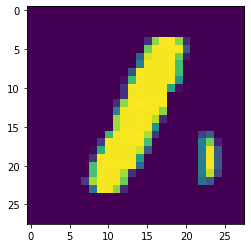

Predicted: 2 
Truth: 1


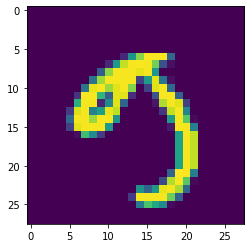

Predicted: 7 
Truth: 9


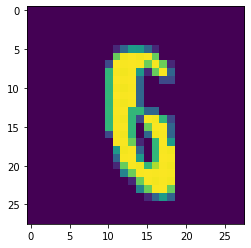

Predicted: 8 
Truth: 6


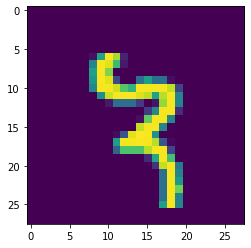

Predicted: 8 
Truth: 3


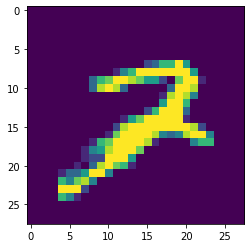

Predicted: 7 
Truth: 2


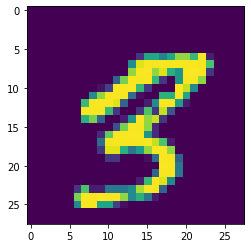

Predicted: 8 
Truth: 3


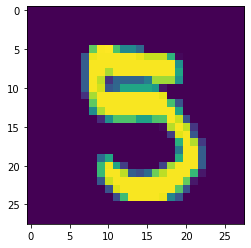

Predicted: 3 
Truth: 5


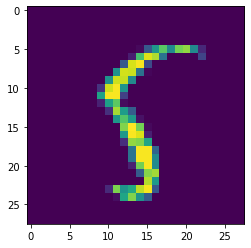

Predicted: 8 
Truth: 5


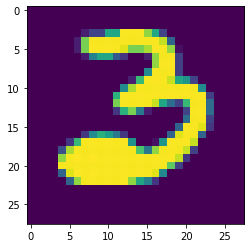

Predicted: 2 
Truth: 3


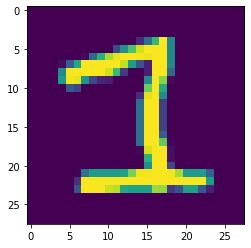

Predicted: 2 
Truth: 1


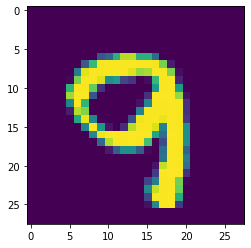

Predicted: 3 
Truth: 9


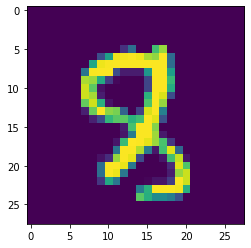

Predicted: 2 
Truth: 8


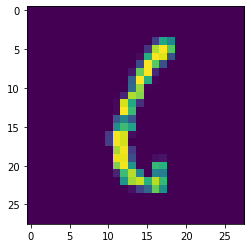

Predicted: 2 
Truth: 6


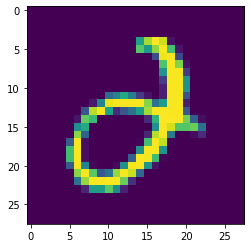

Predicted: 0 
Truth: 2


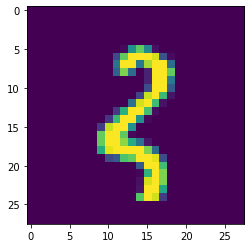

Predicted: 2 
Truth: 3


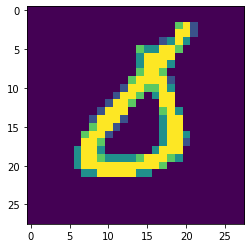

Predicted: 6 
Truth: 0


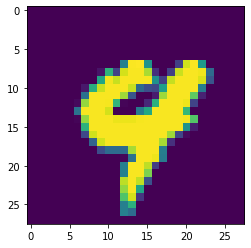

Predicted: 9 
Truth: 4


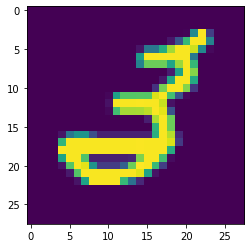

Predicted: 8 
Truth: 3


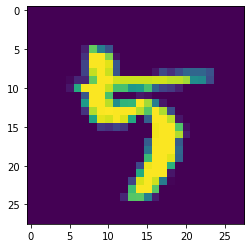

Predicted: 4 
Truth: 5


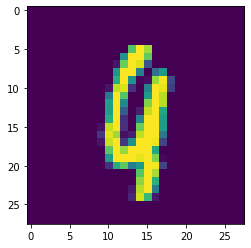

Predicted: 4 
Truth: 9


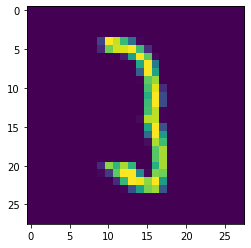

Predicted: 2 
Truth: 3


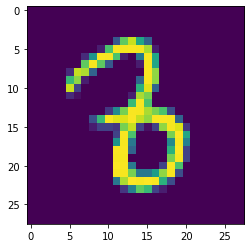

Predicted: 2 
Truth: 8


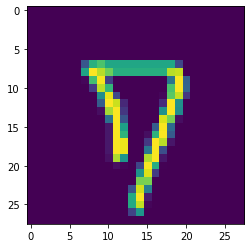

Predicted: 9 
Truth: 7


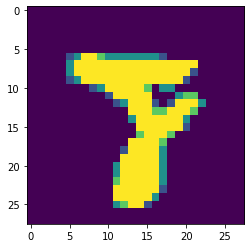

Predicted: 7 
Truth: 8


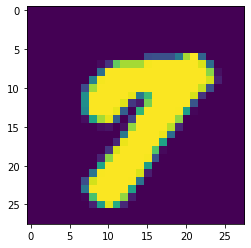

Predicted: 8 
Truth: 7


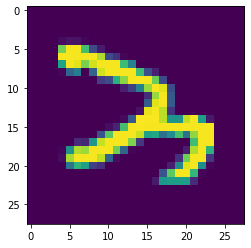

Predicted: 2 
Truth: 3


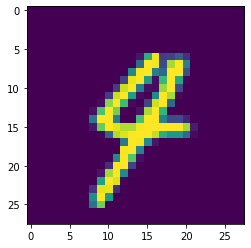

Predicted: 9 
Truth: 4


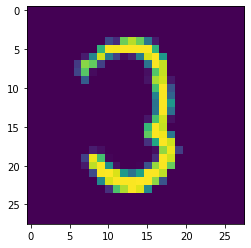

Predicted: 2 
Truth: 3


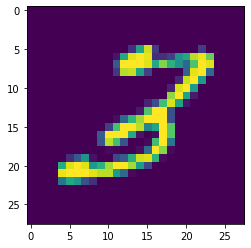

Predicted: 8 
Truth: 3


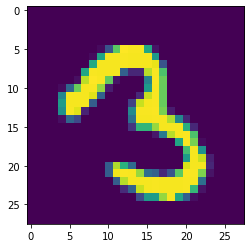

Predicted: 9 
Truth: 3


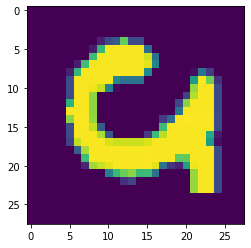

Predicted: 6 
Truth: 9


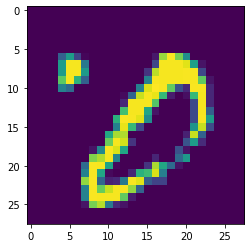

Predicted: 1 
Truth: 0


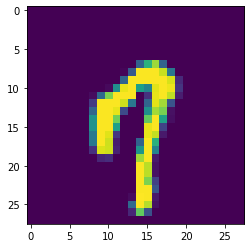

Predicted: 9 
Truth: 7


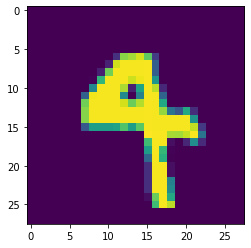

Predicted: 9 
Truth: 4


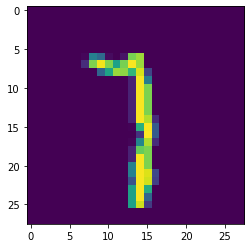

Predicted: 1 
Truth: 7


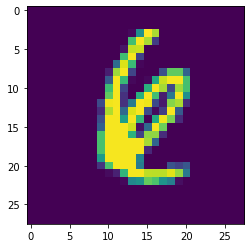

Predicted: 2 
Truth: 6


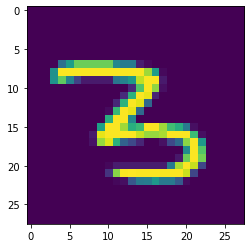

Predicted: 2 
Truth: 3


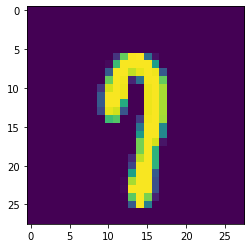

Predicted: 9 
Truth: 7


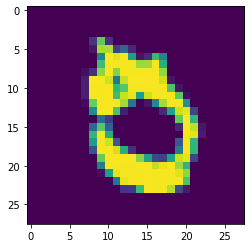

Predicted: 0 
Truth: 5


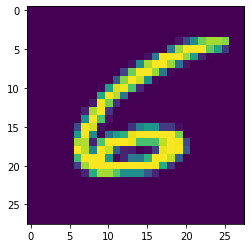

Predicted: 2 
Truth: 6


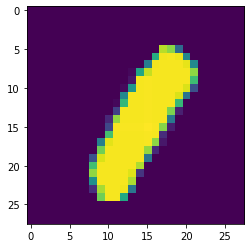

Predicted: 8 
Truth: 1


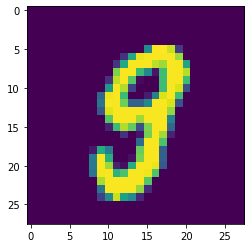

Predicted: 8 
Truth: 9


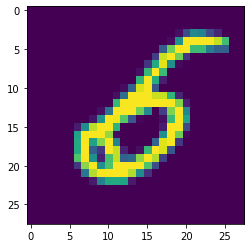

Predicted: 6 
Truth: 5


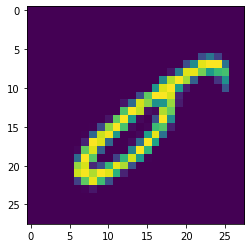

Predicted: 8 
Truth: 0


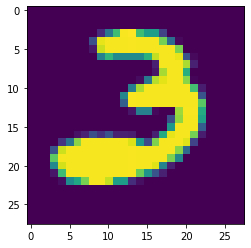

Predicted: 2 
Truth: 3


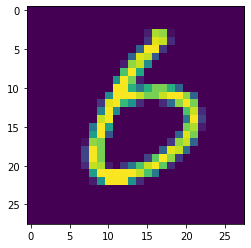

Predicted: 0 
Truth: 6


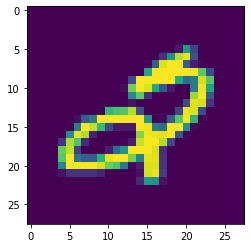

Predicted: 0 
Truth: 2


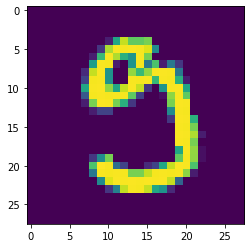

Predicted: 5 
Truth: 9


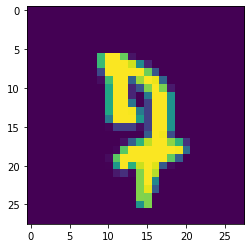

Predicted: 4 
Truth: 7


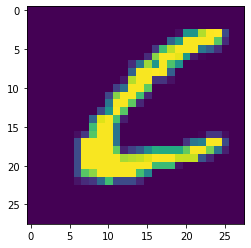

Predicted: 2 
Truth: 6


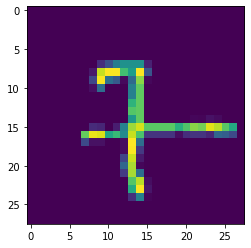

Predicted: 1 
Truth: 7


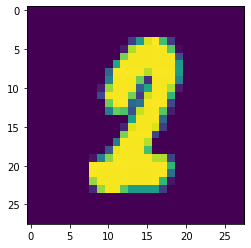

Predicted: 8 
Truth: 2


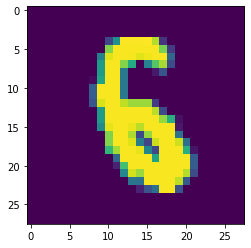

Predicted: 5 
Truth: 6


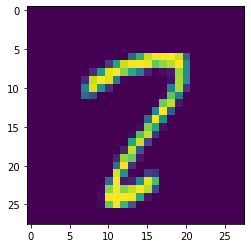

Predicted: 3 
Truth: 2


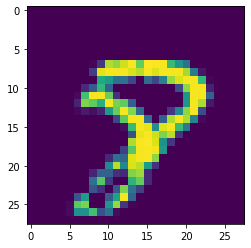

Predicted: 9 
Truth: 8


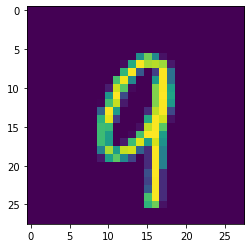

Predicted: 4 
Truth: 9


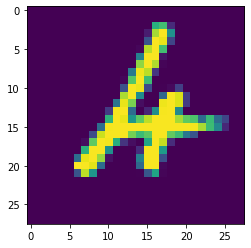

Predicted: 6 
Truth: 4


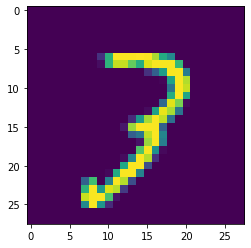

Predicted: 7 
Truth: 3


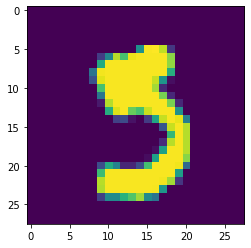

Predicted: 3 
Truth: 5


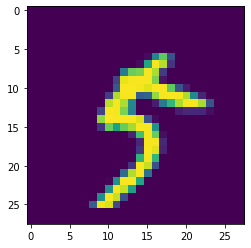

Predicted: 9 
Truth: 5


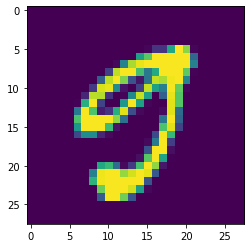

Predicted: 0 
Truth: 9


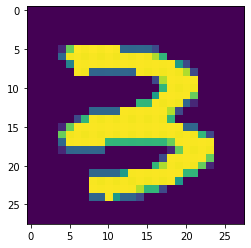

Predicted: 2 
Truth: 3


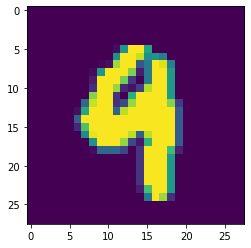

Predicted: 4 
Truth: 9


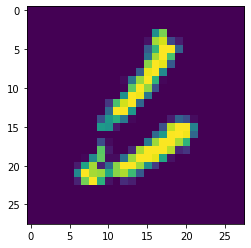

Predicted: 5 
Truth: 6


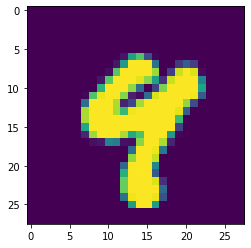

Predicted: 9 
Truth: 4


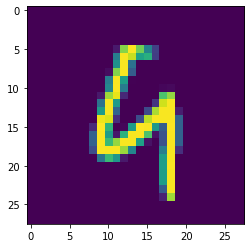

Predicted: 4 
Truth: 9


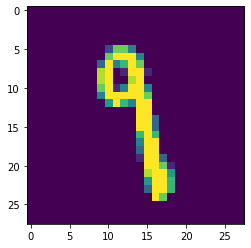

Predicted: 1 
Truth: 9


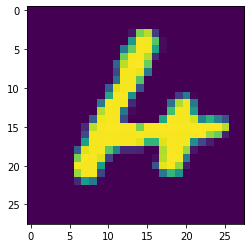

Predicted: 6 
Truth: 4


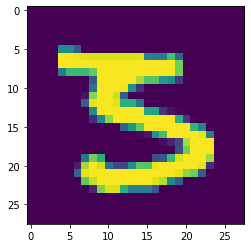

Predicted: 5 
Truth: 3


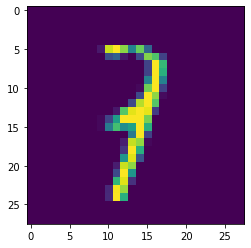

Predicted: 1 
Truth: 7


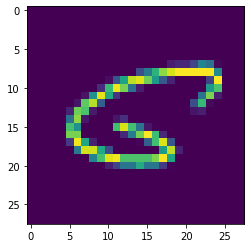

Predicted: 5 
Truth: 6


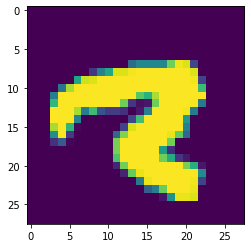

Predicted: 8 
Truth: 2


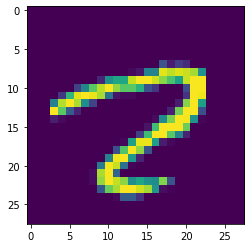

Predicted: 8 
Truth: 2


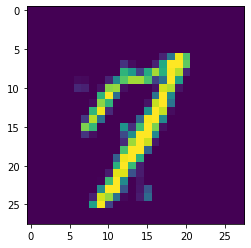

Predicted: 4 
Truth: 7


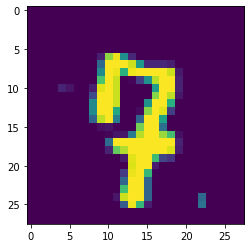

Predicted: 4 
Truth: 7


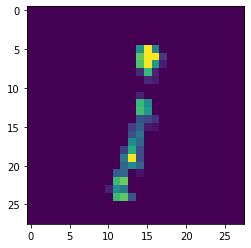

Predicted: 2 
Truth: 1


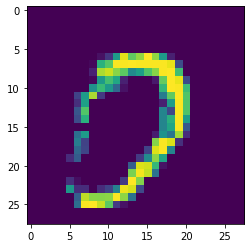

Predicted: 7 
Truth: 0


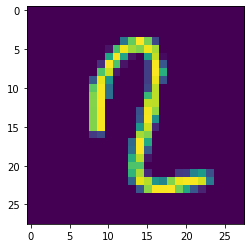

Predicted: 8 
Truth: 2


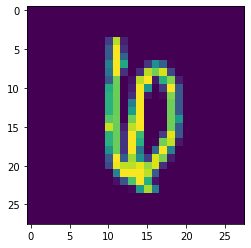

Predicted: 8 
Truth: 6


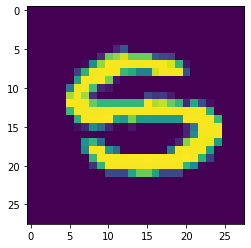

Predicted: 6 
Truth: 5


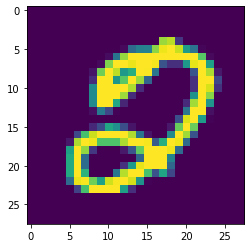

Predicted: 0 
Truth: 2


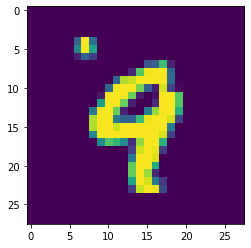

Predicted: 4 
Truth: 9


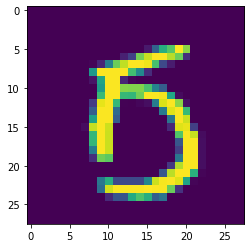

Predicted: 0 
Truth: 5


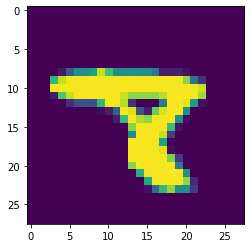

Predicted: 7 
Truth: 8


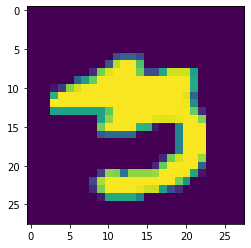

Predicted: 9 
Truth: 3


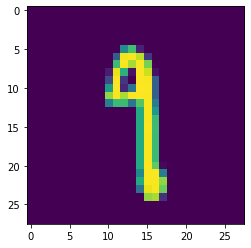

Predicted: 1 
Truth: 9


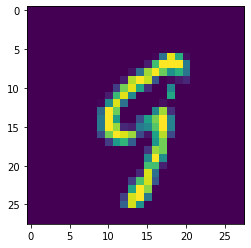

Predicted: 5 
Truth: 9


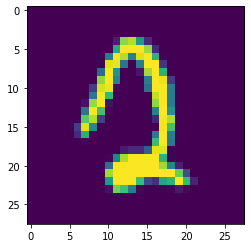

Predicted: 0 
Truth: 2


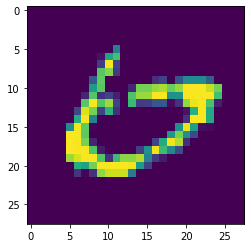

Predicted: 0 
Truth: 6


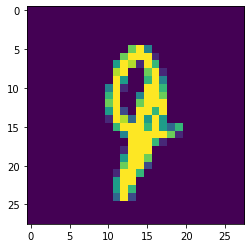

Predicted: 4 
Truth: 9


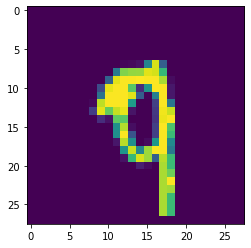

Predicted: 7 
Truth: 9


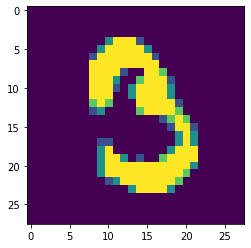

Predicted: 9 
Truth: 3


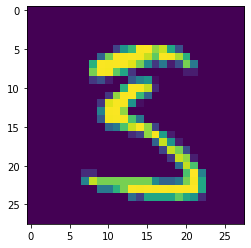

Predicted: 3 
Truth: 5


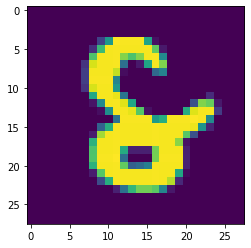

Predicted: 6 
Truth: 8


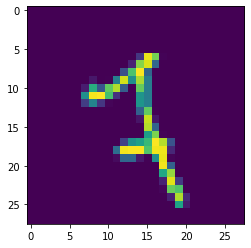

Predicted: 2 
Truth: 7


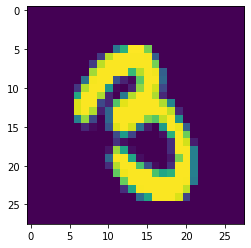

Predicted: 8 
Truth: 3


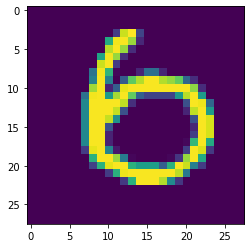

Predicted: 0 
Truth: 6


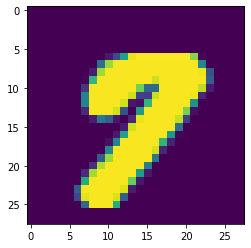

Predicted: 8 
Truth: 7


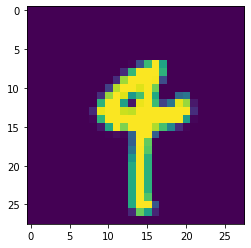

Predicted: 9 
Truth: 4


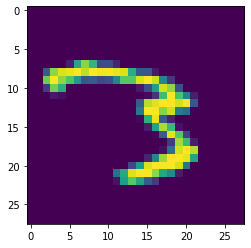

Predicted: 7 
Truth: 3


In [128]:
count = 0
for X, Y in testset:
    predict = int(torch.argmax(net(X.view(-1,28*28))))
    truth = int(Y)
    if predict != truth:
        plt.imshow(X.view(28,28))
        plt.show()
        print("Predicted:", predict,
             "\nTruth:", truth)
        if (count := count + 1) == 100:
                break